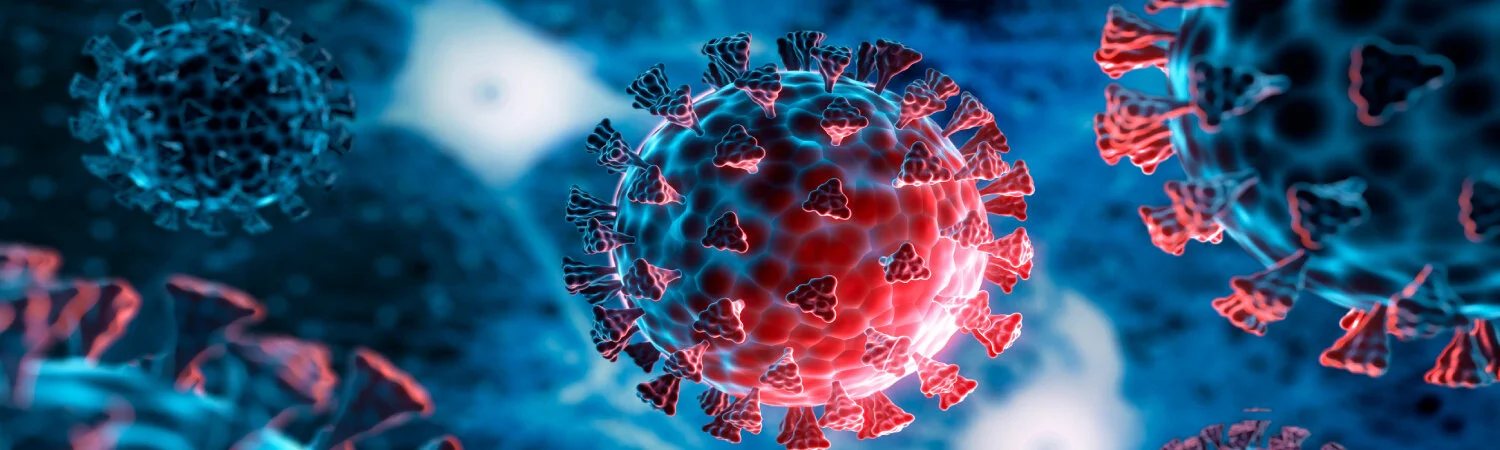

# Reto
##El arte de la analítica

Integrantes:

*   Tania Regina Ramírez Vázquez - A01654087
*   Juan Antonio Mancera Velasco - A01662634
*   Owen Rosales Castro - A01660320

## Importación de librerías

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [25]:
df = pd.read_csv("covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


In [26]:
columns = df.columns
columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

Cálculo de las dimensiones de nuestro data frame.

In [27]:
df.shape

(74436, 13)

Calculamos el número de espacios nulos para cada columna.

In [28]:
df.isnull().sum()

user_name               0
user_location       15218
user_description     4357
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            21434
source                 12
is_retweet              0
dtype: int64

Calculamos el número de datos únicos en cada columna, podemos ver que hay conteos que son inferiores a la cantidad de datos calculada en las dimensiones de nuestro data frame, lo que nos indica que hay datos repetidos.

In [29]:
df.nunique()

user_name           44853
user_location       14622
user_description    42690
user_created        45554
user_followers      15533
user_friends         7627
user_favourites     21115
user_verified           2
date                56546
text                74312
hashtags            23445
source                450
is_retweet              1
dtype: int64

Imprimimos la columna de ubicaciones para calcular las incidencias, sin embargo, podemos observar la existencia de datos que no son ubicaciones reales.

In [30]:
print (round((df['user_location'].value_counts(normalize=True))*100,2))

India                  2.53
United States          1.98
New Delhi, India       1.13
Washington, DC         0.99
Mumbai, India          0.94
                       ... 
Sheltering in Place    0.00
NiggaBalls👁️           0.00
Kaduna Nigeria         0.00
ajmer                  0.00
😷 #stayathome          0.00
Name: user_location, Length: 14622, dtype: float64


# Objetivo 1: Análisis Geográfico

Usamos la importación de geopandas para poder obtener los archivos necesarios para generar un mapa.

1. Creamos un filtro para seleccionar los países que tienen presencia en el data frame. (En el proceso se descartan las ubicaciones que no sean de algún sitio real)
2. Posteriormente se hace un conteo de cada incidencia por país.
3. Usando el número de incidencias por país se genera el mapa usando una escala de color para representar el número de incidencias por cada nación.

<ipython-input-46-f43eae419980>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


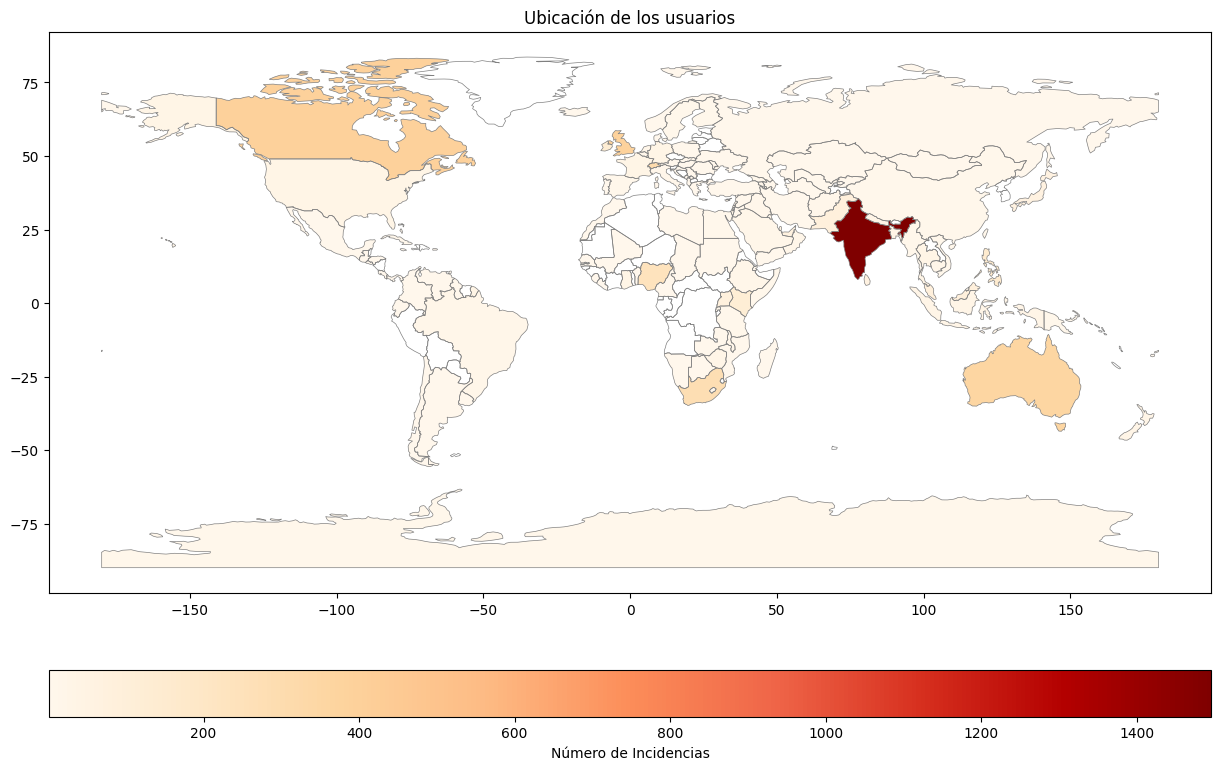

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo de fronteras de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Conjunto de países únicos con presencia
paises_con_presencia = df['user_location'].dropna().unique()

# Número de incidencias por país
num_incidencias = df['user_location'].value_counts().reset_index()
num_incidencias.columns = ['name', 'num_incidencias']

# Unir el número de incidencias al DataFrame world
world = world.merge(num_incidencias, on='name', how='left')
world['num_incidencias'].fillna(0, inplace=True)

# Dibujar mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, color='gray', linewidth=0.5)
world[world['num_incidencias'] > 0].plot(column='num_incidencias', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Número de Incidencias", 'orientation':'horizontal', 'aspect':25, 'pad':0.1})
plt.title('Ubicación de los usuarios')
plt.show()

Podemos observar la nueva variable de incidencias y nombre de países filtrada y observar la cantidad de tweets generados en cada una.

In [32]:
df_sorted = world.sort_values(by='num_incidencias', ascending=False)
print(df_sorted[['name','num_incidencias']])

               name  num_incidencias
98            India           1496.0
3            Canada            396.0
143  United Kingdom            388.0
137       Australia            360.0
127     Switzerland            310.0
..              ...              ...
104      Tajikistan              0.0
100          Bhutan              0.0
39           Belize              0.0
96      South Korea              0.0
176        S. Sudan              0.0

[177 rows x 2 columns]


#Objetivo 2: Análisis de Temas y Palabras Clave

Para esta parte se usa la librería contractions para poder hacer un análisis de los tweets y filtrar la información relevante.

In [44]:
pip install contractions

In [34]:
import contractions

#Proceso de formateo al texto
df['processed'] = df['text'].replace(r'http\S+', ' ', regex=True)         # Remover direcciones web o urls
df['processed'] = df['processed'].str.upper()                             # Convertir texto a mayúsculas
df['processed'] = df['processed'].apply(contractions.fix)                 # Eliminar contracciones dentro del texto
df['processed'] = df['processed'].apply(lambda x:[t for t in x.split() if not t.startswith('@')]).apply(lambda x: ' '.join(x)) # Eliminar tags a otras personas
df['processed'] = df['processed'].replace(r'[^A-Za-z]+', ' ', regex=True) # Analizar las expresiones regulares
df['processed'] = df['processed'].apply(lambda x: x.strip())              # Eliminar espacios innecesarios

Resultado final de los tweets filtrados:

In [35]:
print(df['processed'])

0        IF I SMELLED THE SCENT OF HAND SANITIZERS TODA...
1        HEY AND WOULD NOT IT HAVE MADE MORE SENSE TO H...
2        TRUMP NEVER ONCE CLAIMED COVID WAS A HOAX WE A...
3        THE ONE GIFT COVID HAS GIVE ME IS AN APPRECIAT...
4        JULY MEDIA BULLETIN ON NOVEL CORONAVIRUSUPDATE...
                               ...                        
74431    SO FAR THIS SUMMER I HAVE FILLED UP MY LAWN MO...
74432    ICYMI REPLAY TECHINTERSECT ISAIAH BITCOINZAY J...
74433    COMMUNITY WORKERS IN TIANSHAN DISTRICT OF URUM...
74434    IF ONLY WE HAD A RESPONSIBLE MEDIA TO WARN US ...
74435    MAGA COVID IS JUST A COLD AMP IT WOULD BE GONE...
Name: processed, Length: 74436, dtype: object


Importación de librería para formar una nube de palabras con las palabras más comunes dentro de los tweets.

In [36]:
from wordcloud import WordCloud, STOPWORDS

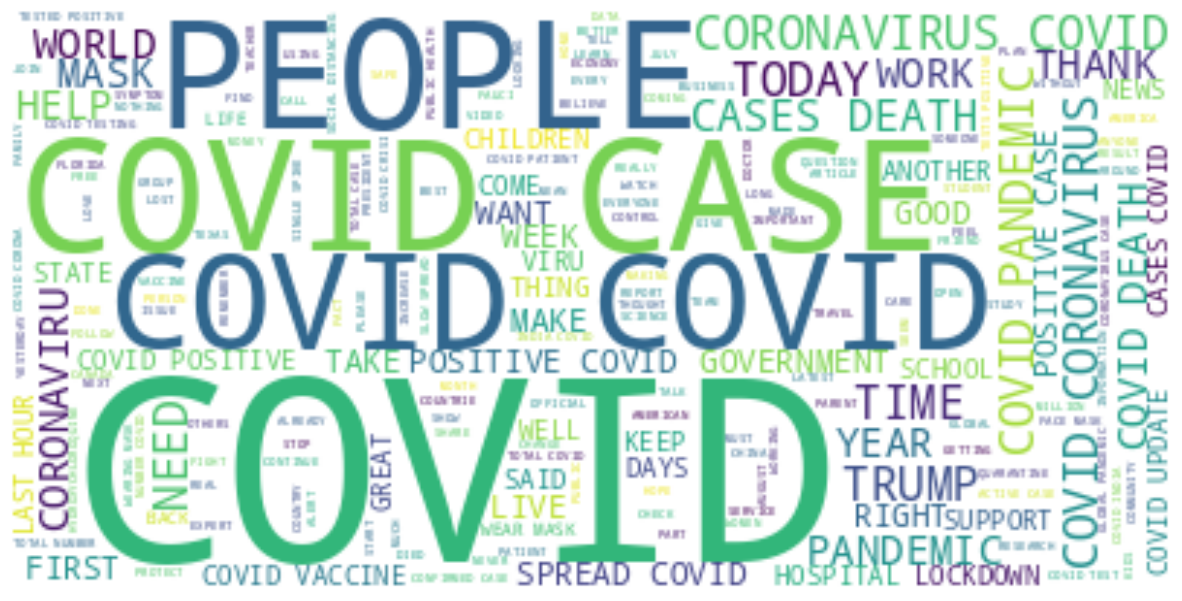

In [37]:
text_list = [review for review in df['processed']]
text = " ".join(text_list)

stopwords = set(STOPWORDS)
# Definición de palabras que no sean tomadas para la nube
stopwords.update(['WILL', 'SAY', 'STILL', 'AMP', 'HTTPS', 'COVID19HTTPS', "GOING", "READ", "MANY", "EVEN", "SAYS", "LOOK", "KNOW", "THINK"])
# Impresión del wordcloud
wordcloud = WordCloud(stopwords=stopwords,background_color="white", min_word_length=4, collocation_threshold=20).generate(text)
plt.figure(figsize = (15,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

#Objetivo 3: Análisis de Hashtags y Tendencias Destacadas

#Frecuencia de Tweets por fecha

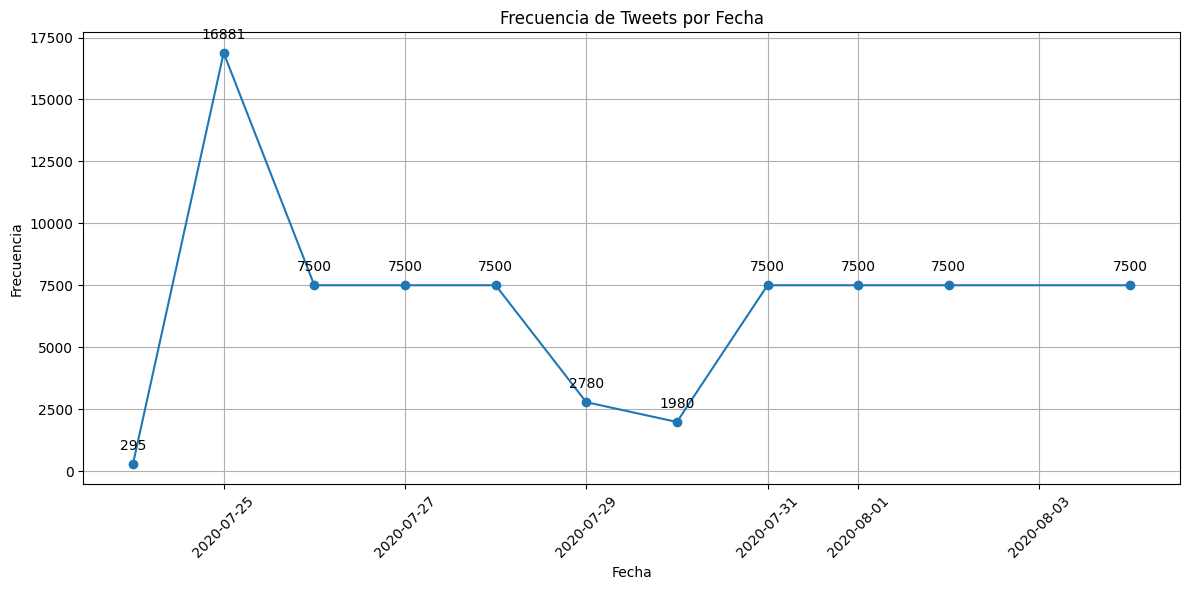

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV en un DataFrame
df = pd.read_csv('covid19_tweets.csv')

# Asegúrate de tener una columna 'fecha' en formato datetime
df['fecha'] = pd.to_datetime(df['date'])

# Añade una nueva columna 'fecha_sin_hora' que contiene solo la fecha
df['fecha_sin_hora'] = df['fecha'].dt.date

# Agrupa los datos por 'fecha_sin_hora' y cuenta el número de tweets en cada grupo
frecuencia_tweets_por_fecha = df.groupby('fecha_sin_hora').size().reset_index(name='frecuencia')

# La variable 'frecuencia_tweets_por_fecha' ahora contiene la frecuencia de tweets por fecha

# Grafica la frecuencia de tweets por fecha
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_tweets_por_fecha['fecha_sin_hora'], frecuencia_tweets_por_fecha['frecuencia'], marker='o', linestyle='-')
plt.title('Frecuencia de Tweets por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.grid(True)

# Agrega etiquetas de datos (número de tweets) en cada punto
for i, row in frecuencia_tweets_por_fecha.iterrows():
    plt.annotate(f'{row["frecuencia"]}', (row['fecha_sin_hora'], row['frecuencia']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

#Análisis de hashtag por fecha


* 25 JULIO 2020


In [39]:
import re

#Análisis del día
dia_interes = '2020-07-25'

#Solo tweets del día de interés
tweets_dia_interes = df[df['fecha'].dt.date == pd.to_datetime(dia_interes).date()]

#Extracción de hashtags
hashtags = []
for tweet in tweets_dia_interes['text']:
    hashtags.extend(re.findall(r'#\w+', tweet))

#Frecuencia de hashtags
frecuencia_hashtags = pd.Series(hashtags).value_counts().reset_index()
frecuencia_hashtags.columns = ['hashtag', 'frecuencia']

#Sort by frecuencia
frecuencia_hashtags = frecuencia_hashtags.sort_values(by='frecuencia', ascending=False)

#los 30 Hashtags más frecuentes
print(frecuencia_hashtags.head(30))

                 hashtag  frecuencia
0               #COVID19        7421
1               #Covid19        1127
2               #covid19         942
3           #coronavirus         663
4           #Coronavirus         298
5              #pandemic         135
6                 #India         114
7              #Covid_19         101
8                #corona         101
9              #lockdown          99
10  #CoronavirusPandemic          96
11    #CoronaVirusUpdate          79
12         #alreadyvideo          77
13                #COVID          76
14  #ShivrajSinghChouhan          75
15               #Odisha          71
16    #moneyforthepeople          70
17         #CoronaInfoCH          70
18    #IndiaFightsCorona          69
19                #Trump          64
20   #CoronaVirusUpdates          63
21          #CoronaVirus          56
22        #MadhyaPradesh          53
23                  #USA          48
24            #WearAMask          44
25               #Corona          43
2

* 04 AGOSTO 2020

In [40]:
#Análisis del día
dia_interes = '2020-08-04'

#Solo tweets del día de interés
tweets_dia_interes = df[df['fecha'].dt.date == pd.to_datetime(dia_interes).date()]

#Extracción de hashtags
hashtags = []
for tweet in tweets_dia_interes['text']:
    hashtags.extend(re.findall(r'#\w+', tweet))

#Frecuencia de hashtags
frecuencia_hashtags = pd.Series(hashtags).value_counts().reset_index()
frecuencia_hashtags.columns = ['hashtag', 'frecuencia']

#Sort by frecuencia
frecuencia_hashtags = frecuencia_hashtags.sort_values(by='frecuencia', ascending=False)

#los 30 Hashtags más frecuentes
print(frecuencia_hashtags.head(30))

                   hashtag  frecuencia
0                 #COVID19        3421
1                 #Covid19         441
2                 #covid19         346
3             #coronavirus         307
4             #Coronavirus          96
5                #Covid_19          77
6                   #India          66
7      #CoronaVirusUpdates          46
8                #pandemic          44
9                   #Trump          44
11                 #corona          39
10                 #Odisha          39
12           #Siddaramaiah          37
13              #Karnataka          36
14                  #COVID          34
15               #lockdown          32
16              #WearAMask          31
17                    #WHO          25
18              #COVIDIOTS          24
19           #CoronaInfoCH          23
21             #wassce2020          22
22  #ZimbabweanLivesMatter          22
20      #IndiaFightsCorona          22
23                  #China          19
24              #Telangan

#Menciones de 'India' en los Tweets por día

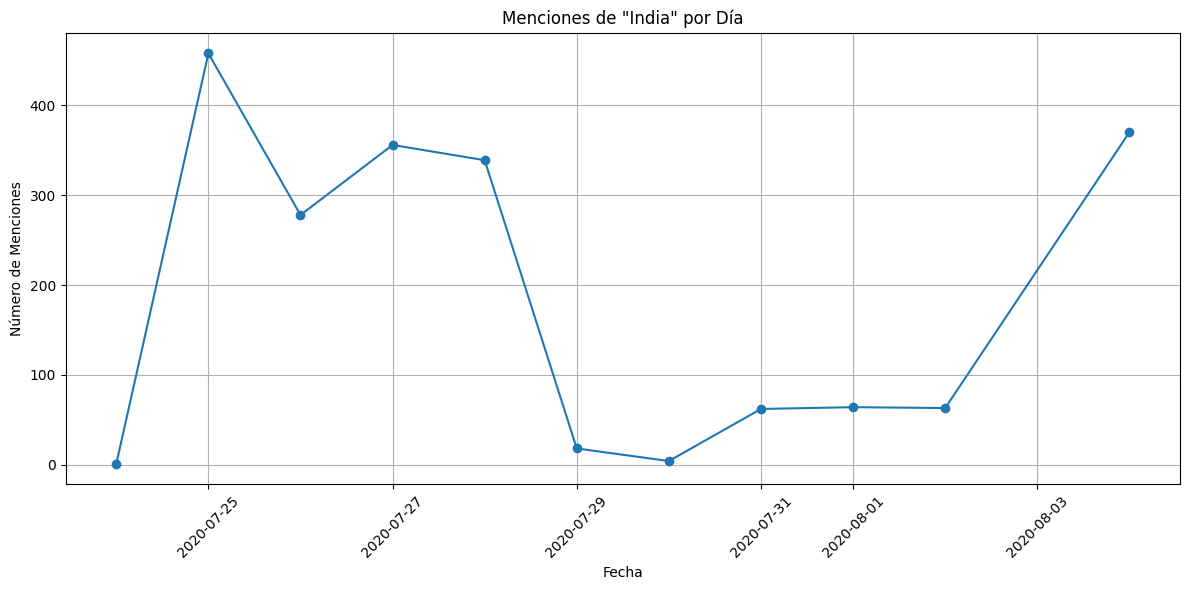

In [41]:


# Define la expresión regular para buscar menciones de "India" (insensible a mayúsculas/minúsculas)
expresion_regular = r'\bIndia\b'

# Inicializa un diccionario para almacenar los resultados por día
resultados_por_dia = {'fecha': [], 'contador_india': []}

# Itera a través de los datos y cuenta las menciones de "India" por día
for fecha, grupo in df.groupby(df['fecha'].dt.date):
    contador_india = 0
    for texto in grupo['text']:
        menciones_india = re.findall(expresion_regular, texto, flags=re.IGNORECASE)
        contador_india += len(menciones_india)
    resultados_por_dia['fecha'].append(fecha)
    resultados_por_dia['contador_india'].append(contador_india)

# Crea un DataFrame de resumen
resumen = pd.DataFrame(resultados_por_dia)

# Grafica el número de menciones de "India" por día
plt.figure(figsize=(12, 6))
plt.plot(resumen['fecha'], resumen['contador_india'], marker='o', linestyle='-')
plt.title('Menciones de "India" por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Menciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Subtabla: Tweets sobre India del día 08 AGOSTO 2020


In [42]:
# Define la fecha de interés (por ejemplo, '2020-07-25')
fecha_interes = '2020-08-04'

# Filtra los tweets que mencionan "India" en la fecha de interés
tweets_interes = df[(df['fecha'].dt.date == pd.to_datetime(fecha_interes).date()) & (df['text'].str.contains('India', case=False))]

tweets_interes

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,fecha,fecha_sin_hora
66952,Biswanath Swain,Bhubaneswar,"News Photographer, The New Indian Express",2014-12-15 15:50:38,221,341,3221,False,2020-08-04 07:56:41,"After 4 months,\nGym centers will open from 5t...","['Bhubaneswar', 'gym', 'gymlife']",Twitter for Android,False,2020-08-04 07:56:41,2020-08-04
66988,India TV,India,India’s most watched Hindi News Channel. Follo...,2009-04-22 11:26:34,1389537,46,196,True,2020-08-04 07:55:18,Hope for vaccine: Novel coronavirus strains sh...,['coronavirus'],Twitter Web App,False,2020-08-04 07:55:18,2020-08-04
66990,Sunil Malhotra,India,Zen maverick at large | white light synthesize...,2010-03-22 05:06:07,2765,952,10041,False,2020-08-04 07:55:13,India blundering through #covid19 ... anyone s...,['covid19'],LinkedIn,False,2020-08-04 07:55:13,2020-08-04
67031,Jatin Gandhi,New Delhi,"Journalist, educator, author, Trainer @GoogleN...",2009-04-16 02:38:24,10262,2073,4367,True,2020-08-04 07:54:07,#COVID19 screening camp at the #PressClubOfInd...,"['COVID19', 'PressClubOfIndia']",Twitter for iPhone,False,2020-08-04 07:54:07,2020-08-04
67068,Cheenku,NaN,MIB,2020-03-23 04:58:44,4,71,54,False,2020-08-04 07:52:54,#IndiaFightsCorona:\n\n📍 Increasing number of ...,"['IndiaFightsCorona', 'COVID19', 'StaySafe', '...",Twitter for Android,False,2020-08-04 07:52:54,2020-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74350,knayha mongha,India,#Engineer. #RenewableEnergy #Enthusiast #IOT #...,2009-11-20 06:39:46,144,86,10062,False,2020-08-04 03:16:33,Discoms' outstanding dues to power gencos rise...,"['India', 'Energy', 'Power']",Twitter Web App,False,2020-08-04 03:16:33,2020-08-04
74353,Khaleej Times,United Arab Emirates,News. Trends. Views. Insights. UAE at your fin...,2009-01-11 07:56:56,566656,1093,493,True,2020-08-04 03:16:14,Indians with visit visas can't travel to UAE y...,"['Covid19', 'Dubai']",Twitter Web App,False,2020-08-04 03:16:14,2020-08-04
74389,ȚâŘîQ wÂňÎ,"Kupwara, Jammu And Kashmir",Student..\nStudying at Degree college Kupwara ...,2017-04-14 12:56:32,5,22,28,False,2020-08-04 03:14:52,"6,61,715 #COVID19 tests conducted in India in ...",['COVID19'],Twitter for Android,False,2020-08-04 03:14:52,2020-08-04
74415,CPI (M),NaN,The official Twitter handle of the Communist P...,2014-02-13 10:07:47,336277,78,3570,True,2020-08-04 03:14:09,India's #COVID19 curve continues to rise unaba...,['COVID19'],Twitter Web App,False,2020-08-04 03:14:09,2020-08-04


#Segmentación de usuarios tomando en cuenta la subtabla: Seguidores vs Amigos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-43-fbad64c25ab6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_interes['cluster'] = labels


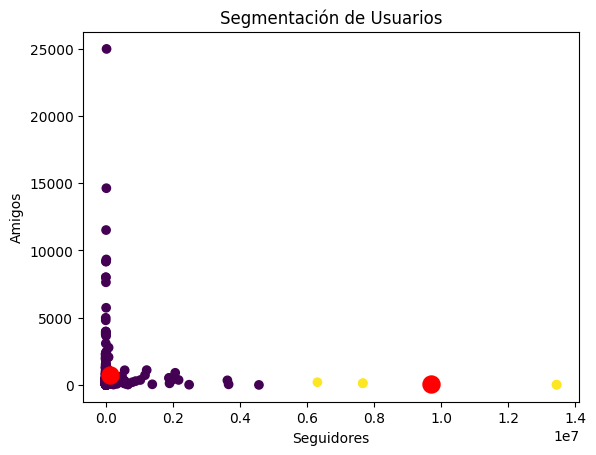

In [43]:
from sklearn.cluster import KMeans

# Preparar datos para clustering
X = tweets_interes[['user_followers', 'user_friends']]

# Crear y entrenar el modelo de K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Obtener las etiquetas de los clusters para cada usuario
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
tweets_interes['cluster'] = labels

# Visualizar los clusters
plt.scatter(tweets_interes['user_followers'], tweets_interes['user_friends'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label='Centroides')

plt.xlabel('Seguidores')
plt.ylabel('Amigos')
plt.title('Segmentación de Usuarios')
plt.show()